In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!pip install imblearn

In [3]:
!pip install delayed

In [4]:
data=pd.read_csv("bank-full.csv",delimiter=";")           #read csv file

In [5]:
data.head()                                                #showing first  5 data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
data.isnull().sum()                                          #checking for null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
data['job'].unique()                                        #checking for categories

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [11]:
data['job']=data['job'].map({'management':0, 'technician':1, 'entrepreneur':2, 'blue-collar':3,
       'unknown':4, 'retired':5, 'admin.':6, 'services':7, 'self-employed':8,
       'unemployed':9, 'housemaid':10, 'student':11})                 #replacing categorical features with nunerical

In [12]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [13]:
data['marital']=data['marital'].map({'married':0,'single':1,'divorced':2})

In [14]:
data['marital'].head()

0    0
1    1
2    0
3    0
4    1
Name: marital, dtype: int64

In [15]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [16]:
data['education']=data['education'].map({'tertiary':0,'secondary':1,'unknown':2,'primary':3})

In [17]:
data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
data['housing']=data['housing'].map({'yes':1,'no':0})

In [19]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
data['loan']=data['loan'].map({'no':0,'yes':1})

In [21]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [22]:
data['contact']=data['contact'].map({'unknown':0,'cellular':1,'telephone':2})

In [23]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [24]:
data['month']=data['month'].map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9})

In [25]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [26]:
data['poutcome']=data['poutcome'].map({'unknown':2, 'failure':0, 'other':3, 'success':1})

In [27]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
data['y']=data['y'].map({'no':0,'yes':1})

In [29]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [30]:
data['default']=data['default'].map({'no':0,'yes':1})

In [31]:
data.drop('duration',axis=1,inplace=True)

In [32]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0,2143,1,0,0,5,5,1,-1,0,2,0
1,44,1,1,1,0,29,1,0,0,5,5,1,-1,0,2,0
2,33,2,0,1,0,2,1,1,0,5,5,1,-1,0,2,0
3,47,3,0,2,0,1506,1,0,0,5,5,1,-1,0,2,0
4,33,4,1,2,0,1,0,0,0,5,5,1,-1,0,2,0


In [33]:
zero=data[data['y']==0]
one=data[data['y']==1]

In [34]:
print(zero.shape,one.shape)

(39922, 16) (5289, 16)


In [35]:
!pip install delayed

In [36]:
data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [37]:
# p=sns.pairplot(data, hue = 'y')

In [38]:
data.corr()                                                                      # finding the correlation

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
age,1.000000,0.004262,-0.126351,0.197850,-0.017879,0.097783,-0.185513,-0.015655,0.092577,-0.009120,0.092903,0.004760,-0.023758,0.001288,-0.011541,0.025155
job,0.004262,1.000000,0.025000,0.259541,-0.007340,-0.029654,-0.041317,-0.012578,0.001588,-0.027535,-0.064629,-0.035410,0.007492,-0.006466,0.001196,0.022396
marital,-0.126351,0.025000,1.000000,-0.109133,0.018404,-0.028172,-0.011671,-0.018526,-0.014290,-0.005217,-0.044321,-0.029294,0.020832,0.006876,0.001636,0.043846
education,0.197850,0.259541,-0.109133,1.000000,0.008114,-0.048649,0.044788,0.002191,-0.068756,-0.024666,-0.061310,0.002234,-0.010713,-0.024818,0.027320,-0.058675
default,-0.017879,-0.007340,0.018404,0.008114,1.000000,-0.066745,-0.006025,0.077234,-0.024095,0.009424,0.014989,0.016822,-0.029979,-0.018329,0.026062,-0.022419
balance,0.097783,-0.029654,-0.028172,-0.048649,-0.066745,1.000000,-0.068768,-0.084350,0.047701,0.004503,0.094605,-0.014578,0.003435,0.016674,-0.017669,0.052838
housing,-0.185513,-0.041317,-0.011671,0.044788,-0.006025,-0.068768,1.000000,0.041323,-0.207722,-0.027982,-0.173887,-0.023599,0.124178,0.037076,-0.061869,-0.139173
loan,-0.015655,-0.012578,-0.018526,0.002191,0.077234,-0.084350,0.041323,1.000000,0.000058,0.011370,0.021638,0.009980,-0.022754,-0.011043,0.013531,-0.068185
contact,0.092577,0.001588,-0.014290,-0.068756,-0.024095,0.047701,-0.207722,0.000058,1.000000,0.038643,0.167103,0.020046,0.210651,0.139518,-0.159046,0.130590
day,-0.009120,-0.027535,-0.005217,-0.024666,0.009424,0.004503,-0.027982,0.011370,0.038643,1.000000,0.101989,0.162490,-0.093044,-0.051710,0.061163,-0.028348


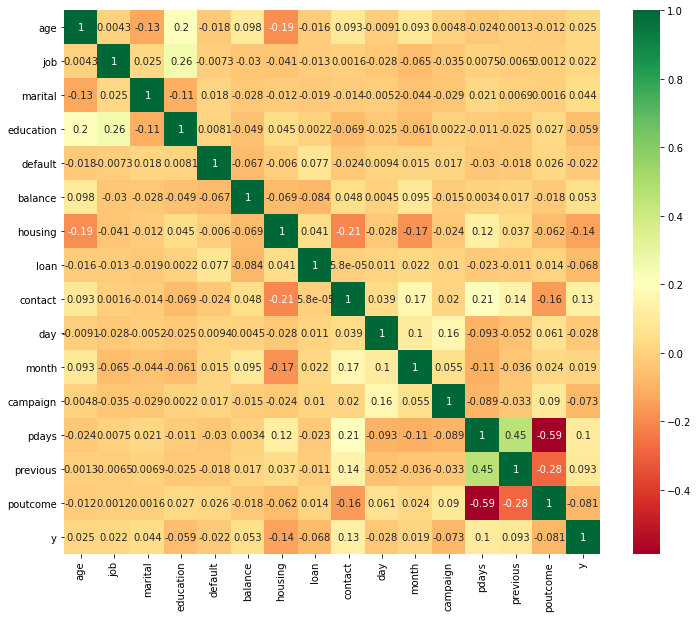

In [39]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')               #heatmap for correlation

In [40]:
columns=data.columns.tolist()
columns=[c for c in columns if c not in ['y']]
target='y'
state=np.random.RandomState(42)
X=data[columns]                                                         #splittig dependent and independent features
Y=data[target]

print(X.shape)
print(Y.shape)

(45211, 15)
(45211,)


In [41]:
from imblearn.over_sampling import RandomOverSampler                 # handling imbalanced data
os=RandomOverSampler(sampling_strategy=1)
x,y=os.fit_resample(X,Y)

In [42]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [43]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,3.526133,0.513238,1.049944,0.018027,1362.272058,0.555838,0.160226,0.776293,15.806419,6.144655,2.763841,40.197828,0.580323,1.790471,0.116985
std,10.618762,3.098343,0.692948,0.968986,0.133049,3044.765829,0.496878,0.366820,0.549747,8.322476,2.408034,3.098021,100.128746,2.303441,0.681057,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,5.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,3.000000,0.000000,1.000000,0.000000,448.000000,1.000000,0.000000,1.000000,16.000000,6.000000,2.000000,-1.000000,0.000000,2.000000,0.000000
75%,48.000000,6.000000,1.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,1.000000,21.000000,8.000000,3.000000,-1.000000,0.000000,2.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [45]:
from sklearn.preprocessing import StandardScaler                       # scaling the input data
sc_X = StandardScaler()
x =  pd.DataFrame(sc_X.fit_transform(x),
        columns=[ 'age','job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome'])

In [46]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,1.398797,-1.114832,-0.792130,-1.027312,-0.122213,0.187604,1.053559,-0.386219,-1.698781,-1.25725,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
1,0.227949,-0.805210,0.650182,0.021852,-0.122213,-0.472658,1.053559,-0.386219,-1.698781,-1.25725,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
2,-0.692003,-0.495588,-0.792130,0.021852,-0.122213,-0.481091,1.053559,2.589204,-1.698781,-1.25725,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
3,0.478845,-0.185966,-0.792130,1.071016,-0.122213,-0.011349,1.053559,-0.386219,-1.698781,-1.25725,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
4,-0.692003,0.123656,0.650182,1.071016,-0.122213,-0.481403,-0.949164,-0.386219,-1.698781,-1.25725,-0.467712,-0.562971,-0.484742,-0.334368,0.380682


In [47]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,1.398797,-1.114832,-0.792130,-1.027312,-0.122213,0.187604,1.053559,-0.386219,-1.698781,-1.257250,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
1,0.227949,-0.805210,0.650182,0.021852,-0.122213,-0.472658,1.053559,-0.386219,-1.698781,-1.257250,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
2,-0.692003,-0.495588,-0.792130,0.021852,-0.122213,-0.481091,1.053559,2.589204,-1.698781,-1.257250,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
3,0.478845,-0.185966,-0.792130,1.071016,-0.122213,-0.011349,1.053559,-0.386219,-1.698781,-1.257250,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
4,-0.692003,0.123656,0.650182,1.071016,-0.122213,-0.481403,-0.949164,-0.386219,-1.698781,-1.257250,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79839,0.980637,0.742901,2.092494,1.071016,-0.122213,-0.401447,-0.949164,-0.386219,0.275793,-0.543299,0.312417,-0.187227,-0.484742,-0.334368,0.380682
79840,1.315165,-1.114832,-0.792130,-1.027312,-0.122213,-0.222483,1.053559,2.589204,0.275793,-0.900274,-0.467712,-0.562971,2.869648,0.066432,-1.010020
79841,0.395213,1.981389,-0.792130,0.021852,-0.122213,-0.469847,-0.949164,-0.386219,0.275793,1.122586,1.872676,-0.562971,-0.484742,-0.334368,0.380682
79842,-0.022947,0.742901,-0.792130,2.120179,-0.122213,-0.577288,1.053559,-0.386219,-1.698781,-0.067332,-0.467712,-0.562971,-0.484742,-0.334368,0.380682


In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [78]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=355, stratify=y)

In [54]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
3,0.478845,-0.185966,-0.792130,1.071016,-0.122213,-0.011349,1.053559,-0.386219,-1.698781,-1.257250,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
63339,0.562477,-0.185966,-0.792130,2.120179,-0.122213,-0.257151,-0.949164,2.589204,0.275793,-0.543299,0.702482,0.940003,-0.484742,-0.334368,0.380682
63757,0.813373,-0.805210,-0.792130,0.021852,-0.122213,1.654612,-0.949164,-0.386219,2.250367,-1.019266,0.312417,-0.562971,-0.484742,-0.334368,0.380682
2490,0.395213,-0.185966,0.650182,2.120179,-0.122213,-0.370839,1.053559,-0.386219,-1.698781,-0.305315,-0.467712,-0.562971,-0.484742,-0.334368,0.380682
2212,1.231533,0.742901,-0.792130,0.021852,-0.122213,0.170114,1.053559,-0.386219,-1.698781,-0.424307,-0.467712,-0.562971,-0.484742,-0.334368,0.380682


In [55]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train)) 
print(clf.score(x_test,y_test))                                  

0.6594192007748443
0.6602875607434497


In [56]:
from sklearn.metrics import confusion_matrix

y_pred1=clf.predict(x_test)
y_pred1

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [57]:
confusion_matrix(y_test,y_pred1)
pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,6319,3662,9981
1,3119,6861,9980
All,9438,10523,19961


Text(0.5, 15.0, 'Predicted label')

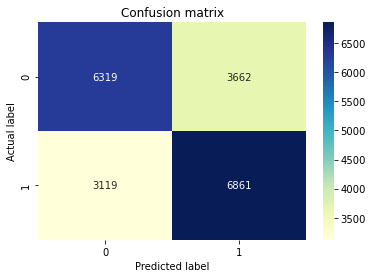

In [58]:
y_pred1 = clf.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1)) 

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      9981
           1       0.65      0.69      0.67      9980

    accuracy                           0.66     19961
   macro avg       0.66      0.66      0.66     19961
weighted avg       0.66      0.66      0.66     19961



In [60]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [61]:
print(train_scores)                                                                       #scores
print(test_scores)

[1.0, 0.9991984369520565, 0.9469799442245712, 0.9446921496918992, 0.9059833341682948, 0.9013242489521233, 0.8726349715278126, 0.8665898502079055, 0.843711904881185, 0.8384516473790559, 0.8223869879598551, 0.8169430389259055, 0.8079087554063757, 0.8014962510228278]
[0.9462451780972897, 0.9417363859526076, 0.9005059866740144, 0.890837132408196, 0.8607284204198187, 0.8463002855568358, 0.8253594509293122, 0.812183758328741, 0.7965031812033465, 0.787986573818947, 0.7744100996944041, 0.7702519913831972, 0.7648915385000752, 0.7631882170231953]


In [62]:
y_pred3 = knn.predict(x_test)
y_pred3

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [63]:
confusion_matrix(y_test,y_pred3)
pd.crosstab(y_test, y_pred3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7460,2521,9981
1,2206,7774,9980
All,9666,10295,19961


Text(0.5, 15.0, 'Predicted label')

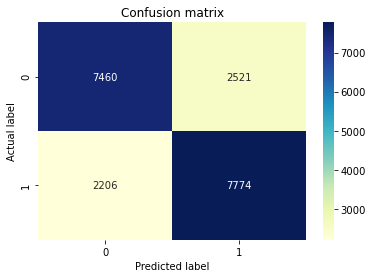

In [64]:
y_pred3 = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred3)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      9981
           1       0.76      0.78      0.77      9980

    accuracy                           0.76     19961
   macro avg       0.76      0.76      0.76     19961
weighted avg       0.76      0.76      0.76     19961



In [66]:
from sklearn.ensemble import RandomForestClassifier


In [67]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
rf=RandomForestClassifier()

In [71]:
rf_random= RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  21.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  56.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  56.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  56.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  56.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.6min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 1.5min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
y_pred2 = rf_random.predict(x_test)
y_pred2

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
confusion_matrix(y_test,y_pred2)
pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,9444,537,9981
1,12,9968,9980
All,9456,10505,19961


Text(0.5, 15.0, 'Predicted label')

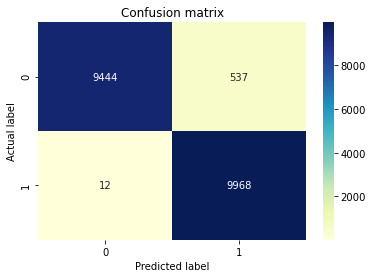

In [75]:
y_pred2 = rf_random.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred2)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2)) 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      9981
           1       0.95      1.00      0.97      9980

    accuracy                           0.97     19961
   macro avg       0.97      0.97      0.97     19961
weighted avg       0.97      0.97      0.97     19961



For the given data,based on the analysis and model buliding we understand that the RandomForestClassifier
performs better as it has a better F-1 score.